In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib as mpl
import seaborn as sns 
import cmasher as cmr
import pandas as pd 

In [262]:
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch"
#file="MAG2P_nbonded-2025-2-6-16:25:37.pickle"
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_nbonded-2025-2-14-19:59:9.pickle"

dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_nbonded-2025-3-4-18:34:52.pickle" 
df = pd.read_pickle(dir)

print(df["lambda"].unique())

eval_shifts = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
mask = df['shift'].isin(eval_shifts)
df = df[mask]

eval_lambda = [2.0, 2.3, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 15.0, 17.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0, 70.0,
 100.0]
mask = df['lambda'].isin(eval_lambda)
df = df[mask]


df = df.sort_values(["lambda","shift"])   
bonds = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index()
radius =  df.groupby(["lambda","shift"])[["mean_radius_of_gyration","std_radius_of_gyration"]].mean().reset_index()
size =  df.groupby(["lambda","shift"])[["mean_size", "std_size"]].mean().reset_index()
largest =  df.groupby(["lambda","shift"])[["largest"]].mean().reset_index()


[70.0 30.0 40.0 1.8 25.0 50.0 35.0 2.3 1.0 2.5 9.0 100.0 0.5 17.0 1.25 1.5
 10.0 8.0 3.0 20.0 7.0 6.0 12.0 4.0 2.0 1.75 1.9 0.75 3.5 5.0 15.0 4.5 2.1]


In [263]:
grouped = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index()
print(grouped)
print(df["shift"].unique())
print(df["lambda"].unique())


df.groupby(['lambda','shift']).size().reset_index().rename(columns={0:'count'})

     lambda  shift mean_bonds std_bonds
0       2.0    0.1      0.857  0.733731
1       2.0    0.2    0.80175   0.72668
2       2.0    0.3    0.72125  0.717966
3       2.0    0.4    0.69075  0.738046
4       2.0    0.5      1.008  0.923989
..      ...    ...        ...       ...
142   100.0    0.3    1.65375  0.514709
143   100.0    0.4    2.22875  0.743051
144   100.0    0.5    1.56925  0.735378
145   100.0    0.6     1.4175  0.596534
146   100.0    0.7    1.08375  0.623706

[147 rows x 4 columns]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[2.0 2.3 3.5 4.0 5.0 6.0 7.0 8.0 9.0 10.0 12.0 15.0 17.0 20.0 25.0 30.0
 35.0 40.0 50.0 70.0 100.0]


,lambda,shift,count
0,2.0,0.1,8
1,2.0,0.2,8
2,2.0,0.3,8
3,2.0,0.4,8
4,2.0,0.5,8
...,...,...,...
142,100.0,0.3,8
143,100.0,0.4,8
144,100.0,0.5,8
145,100.0,0.6,8


In [264]:

def heatmap(df):

    
    shifts = df["shift"].unique()
    lambdas=  df["lambda"].unique()
    mpl.rc("legend", fontsize=50)

    arr = df.values.astype(float)
    arr = np.reshape(arr[:,2], (len(lambdas), len(shifts)))
    arr = np.round(arr, decimals=2)

    fig, ax = plt.subplots(figsize=(10,10))
    im = sns.heatmap(
        arr,
        ax=ax,
        linewidth=1,
        annot=False,
        cmap=cmr.chroma,
        cbar=False,
        linecolor="black"
    )
    im.invert_yaxis()
    new_xticks = shifts
    new_yticks = lambdas
    ax.set_xticks(
        np.arange(0, len(shifts)),
        new_xticks,
        rotation=45,
        horizontalalignment="right",
    )
    ax.set_yticks(
        np.arange(0, len(lambdas)),
        new_yticks,
        rotation=0,
        verticalalignment="bottom",
    )
    im.set_ylabel("$\lambda$", size=20)
    im.set_xlabel("shift s", size=20)
    im.set_yticks(np.arange(0, len(lambdas)), new_yticks)
    im.tick_params(axis="both", which="major", labelsize=15)
    plt.tight_layout()

    mappable = im.get_children()[0]
    #plt.colorbar(mappable, ax=axes, orientation="horizontal")
    plt.colorbar(mappable, ax=ax, orientation="horizontal")
    plt.tight_layout()
    plt.show()



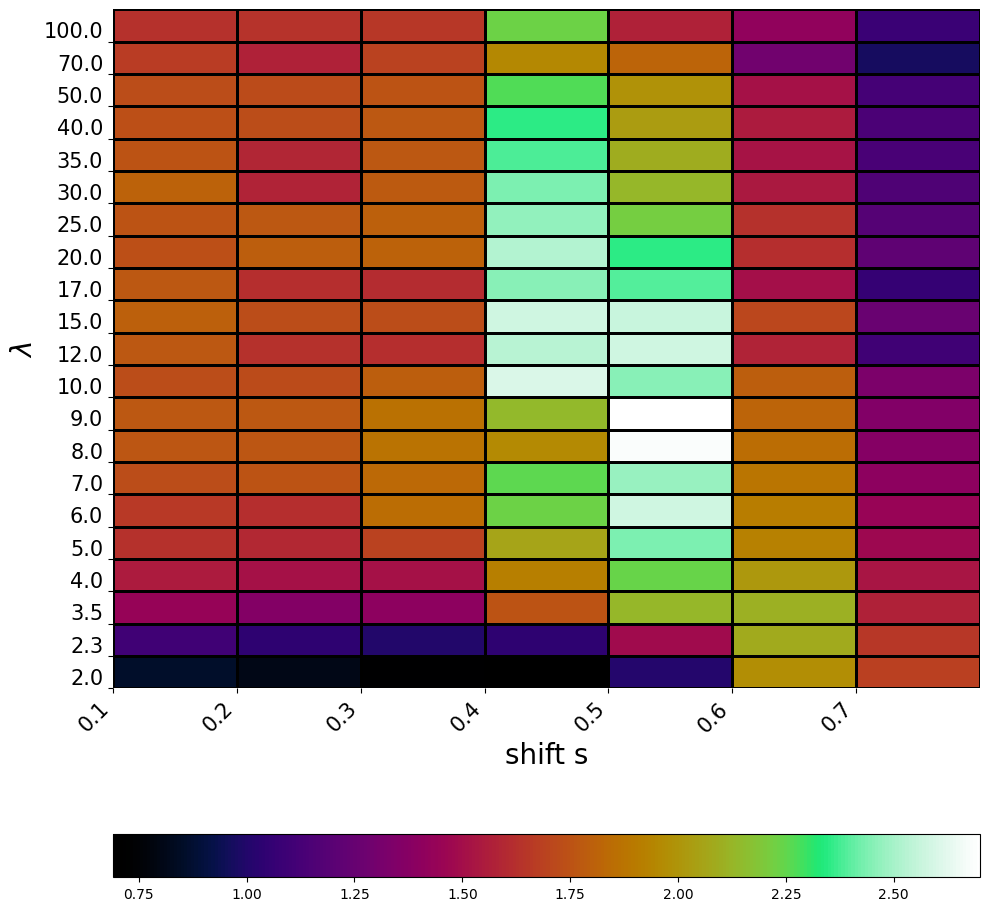

In [265]:

heatmap(bonds)

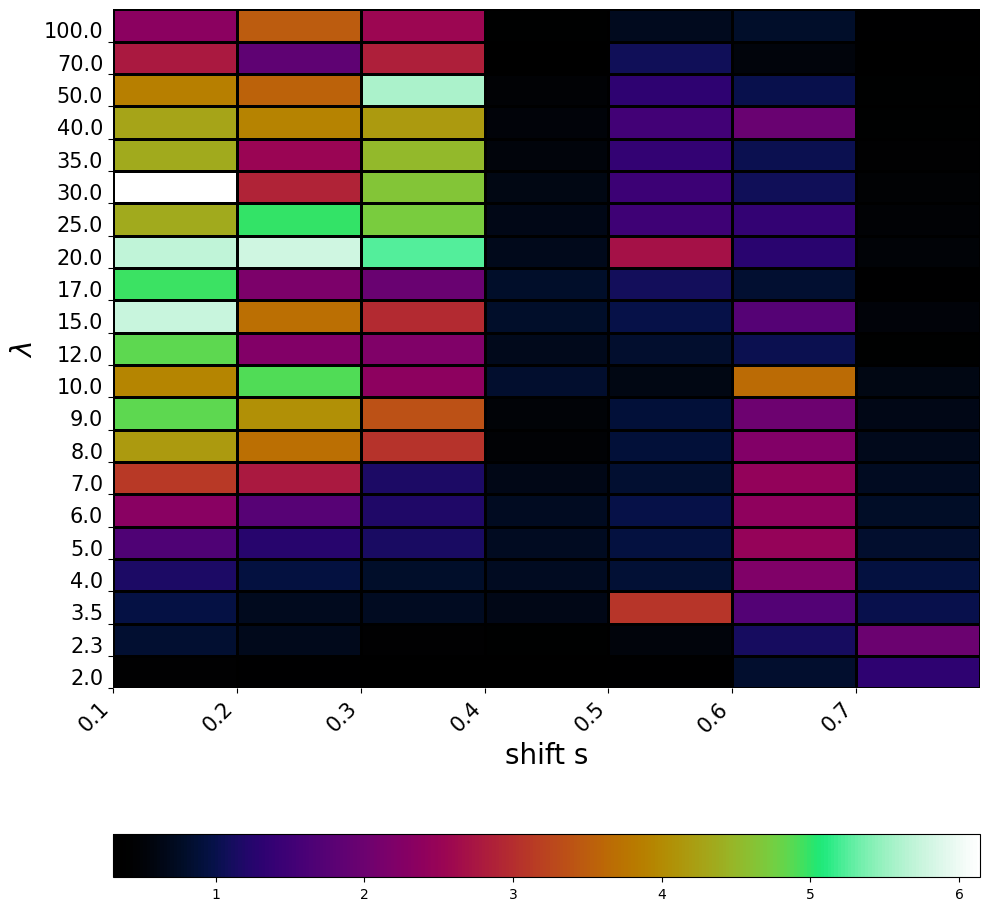

In [267]:

heatmap(radius)


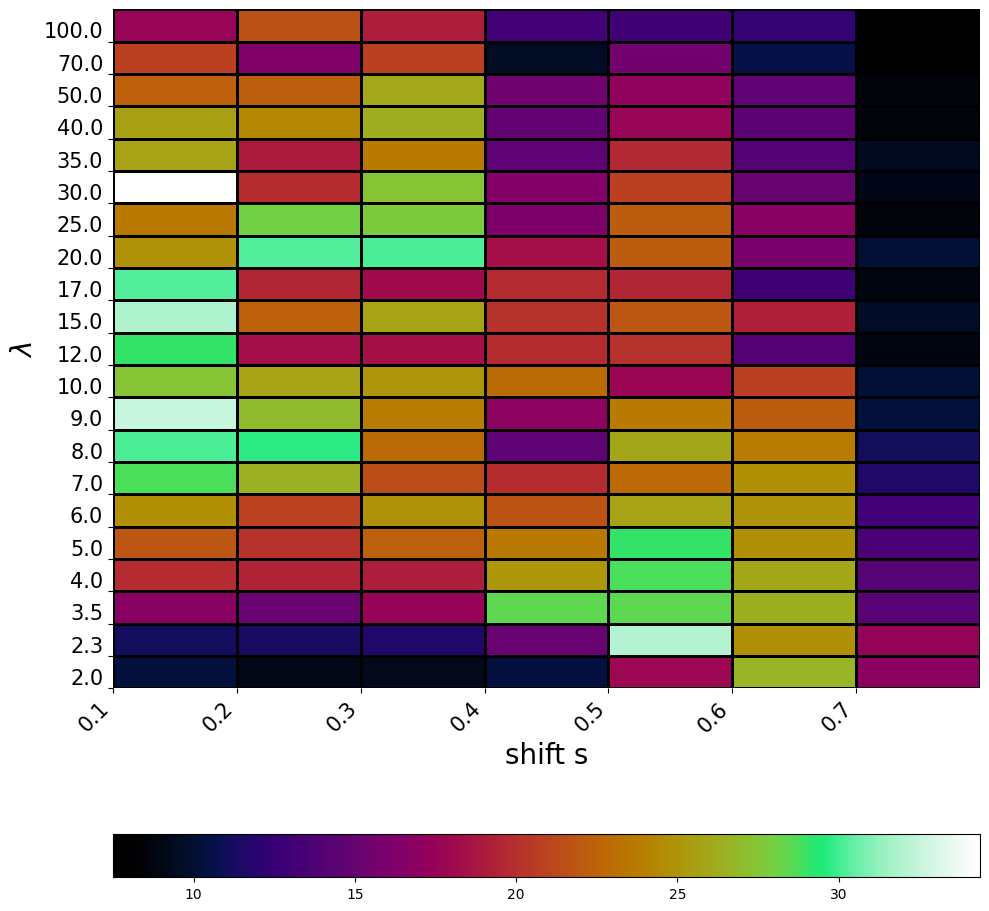

In [268]:
heatmap(largest)

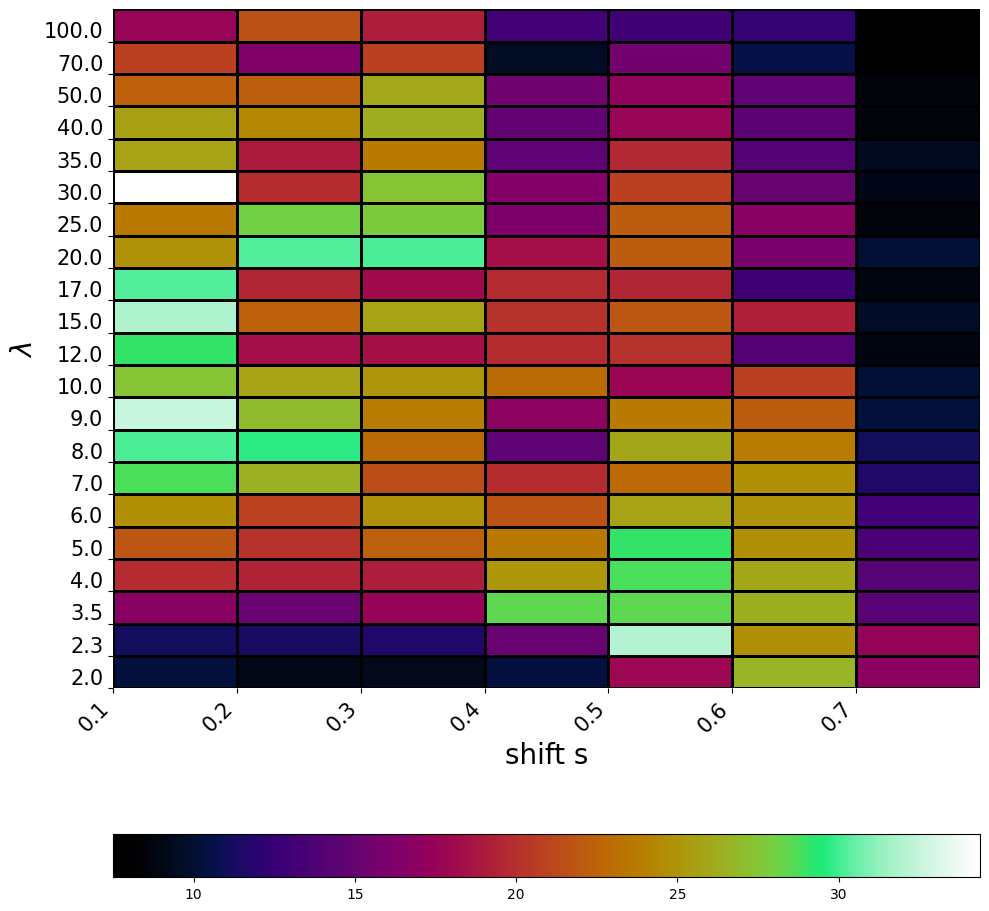

In [269]:
heatmap(largest)

## Order parameter testing 

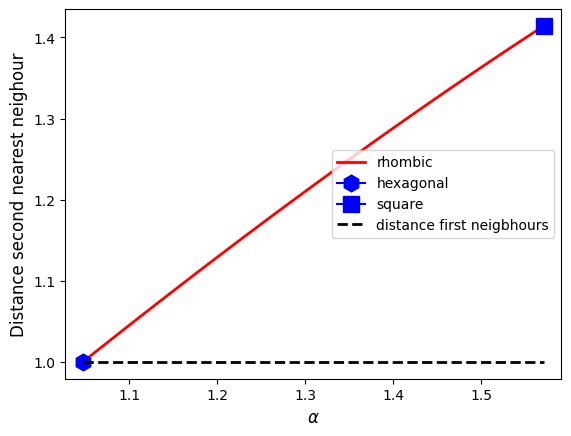

In [2]:
def rhombus_dshort(alpha):
    side_length = 1 
    dshort = side_length*np.sqrt(2-2*np.cos(alpha))
    return dshort 

alpha = np.linspace(np.pi/3,np.pi/2,100)

fig,ax = plt.subplots()
plt.plot(alpha,rhombus_dshort(alpha),c='r', lw=2, label="rhombic")
plt.xlabel("$\\alpha$",size=12)
plt.ylabel("Distance second nearest neighour",size=12)
plt.xlim((np.pi/3-0.02,np.pi/2+0.02))
plt.plot(np.pi/3,1,label="hexagonal", c='b', ms=12, marker="h")
plt.plot(np.pi/2,np.sqrt(2), label="square", c="b", ms=12, marker='s')
plt.plot(alpha,np.ones(len(alpha)), label="distance first neigbhours", c='k', lw=2, ls='--')
plt.rc('legend',fontsize=10)
plt.legend(loc=5)
plt.show()

In [6]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
import glob 
import gzip 
import pandas as pd 
from datetime import datetime
import numba 
import cProfile
from scipy.spatial.distance import squareform
from pathlib import Path


def read_lammpstrj(t):
    Nskip = 9
    Natoms=3000 
    Nparticles = Natoms/3 
    lx_box = 270 
    ly_box = 270
    lz_box = 3

    frames = []
    frame_nr_old = -1 
    mfile = Path(t)
    if mfile.is_file():
        with gzip.open(t, "r") as traj_file:
            try: 
                for i,line in enumerate(traj_file):
                    modulo = i % (Nskip+Natoms)
                    frame_nr = i // (Nskip+Natoms)
                    if frame_nr != frame_nr_old:
                        frames.append([])

                    if modulo >=Nskip:
                        whole_line = np.array(line.split()).astype(float)
                        if whole_line[1] == 1:
                            x = whole_line[2]*lx_box
                            y = whole_line[3]*ly_box
                            z = whole_line[4]*lz_box 
                            frames[-1].append(np.array([x,y,z])) 

                    frame_nr_old = frame_nr
            except EOFError as er:
                print(er)
        
        if frames:
            if len(frames[-1])!=Nparticles:
                del frames[-1]

    frames = np.array(frames)
    return frames 


In [21]:

file_case_a = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.5_lambda_2.3_phi2d_0.0106_rid_8/traj.gz"
file_case_b = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.5_lambda_3.5_phi2d_0.0106_rid_2/traj.gz"

framesA = read_lammpstrj(file_case_a)
framesB = read_lammpstrj(file_case_b)



Compressed file ended before the end-of-stream marker was reached
Compressed file ended before the end-of-stream marker was reached


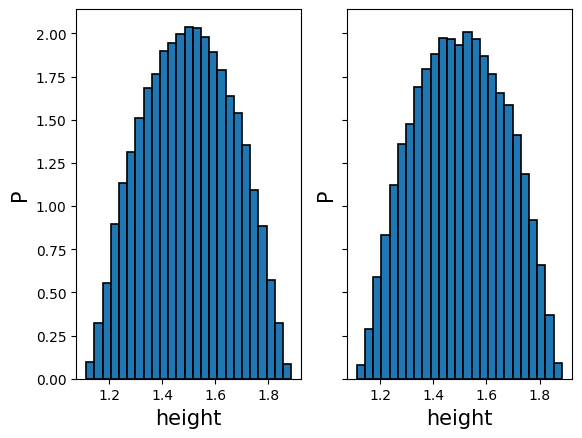

In [28]:
posA=framesA[-50:,:,2]
posB=framesB[-50:,:,2]

posA=posA.flatten()
posB=posB.flatten()

fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.hist(posA,bins=25, density=True,edgecolor="black",lw=1.2)
ax2.hist(posB,bins=25, density=True,edgecolor="black",lw=1.2)
ax1.set_xlabel("height",size=15)
ax1.set_ylabel("P",size=15)
ax2.set_xlabel("height",size=15)
ax2.set_ylabel("P",size=15)
plt.show()

In [5]:
a=np.arange(10)
a[-3:]

array([7, 8, 9])

In [45]:
dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/test/MAG2P_moments-2025-3-13-15:3:59.pickle"
df = pd.read_pickle(dir)
df.head(20)

,0.0,0.125664,0.251327,0.376991,0.502655,0.628319,0.753982,0.879646,1.00531,1.130973,...,5.403539,5.529203,5.654867,5.78053,5.906194,6.031858,6.157522,file_id,lambda,shift
0,0.054976,0.061848,0.109952,0.03436,0.096208,0.123696,0.384831,0.584118,0.810893,0.680326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0.4_lambda_10_phi2d_0.0106_rid_2,10.0,0.4
0,5.891699,1.947424,0.009885,0.0,0.088969,0.019771,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0_lambda_100_phi2d_0.0106_rid_2,100.0,0.0
0,0.007856,0.0,0.0,0.015711,0.015711,0.054989,0.219957,0.290658,0.322081,0.604883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0.4_lambda_100_phi2d_0.0106_rid_3,100.0,0.4
0,0.031831,0.031831,0.023873,0.055704,0.111408,0.119366,0.206901,0.262606,0.262606,0.501338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0.4_lambda_100_phi2d_0.0106_rid_8,100.0,0.4
0,0.0,0.00784,0.02352,0.02352,0.02352,0.02352,0.203844,0.337126,0.423368,0.580171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0.4_lambda_100_phi2d_0.0106_rid_2,100.0,0.4
0,1.034695,2.63377,2.332767,1.269853,0.451503,0.159907,0.028219,0.028219,0.009406,0.009406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0_lambda_10_phi2d_0.0106_rid_2,10.0,0.0
0,1.152889,2.483867,2.277659,1.321605,0.506146,0.168715,0.028119,0.009373,0.0,0.009373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0_lambda_10_phi2d_0.0106_rid_5,10.0,0.0
0,1.195085,2.3712,2.418624,1.346842,0.388877,0.151757,0.028454,0.028454,0.01897,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0_lambda_10_phi2d_0.0106_rid_8,10.0,0.0
0,1.139512,2.55213,2.448538,1.280774,0.329611,0.150679,0.047087,0.009417,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0_lambda_10_phi2d_0.0106_rid_3,10.0,0.0
0,0.061476,0.061476,0.054645,0.075138,0.088799,0.150275,0.259566,0.662576,0.70356,0.614762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mag2p_shift_0.4_lambda_10_phi2d_0.0106_rid_7,10.0,0.4


[0.0, 0.12566370614359174, 0.25132741228718347, 0.3769911184307752, 0.5026548245743669, 0.6283185307179586, 0.7539822368615504, 0.8796459430051422, 1.0053096491487339, 1.1309733552923256, 1.2566370614359172, 1.3823007675795091, 1.5079644737231008, 1.6336281798666925, 1.7592918860102844, 1.884955592153876, 2.0106192982974678, 2.1362830044410597, 2.261946710584651, 2.387610416728243, 2.5132741228718345, 2.6389378290154264, 2.7646015351590183, 2.8902652413026098, 3.0159289474462017, 3.1415926535897936, 3.267256359733385, 3.392920065876977, 3.518583772020569, 3.6442474781641603, 3.769911184307752, 3.8955748904513436, 4.0212385965949355, 4.1469023027385274, 4.272566008882119, 4.39822971502571, 4.523893421169302, 4.649557127312894, 4.775220833456486, 4.900884539600078, 5.026548245743669, 5.152211951887261, 5.277875658030853, 5.403539364174445, 5.529203070318037, 5.6548667764616285, 5.7805304826052195, 5.906194188748811, 6.031857894892403, 6.157521601035995]


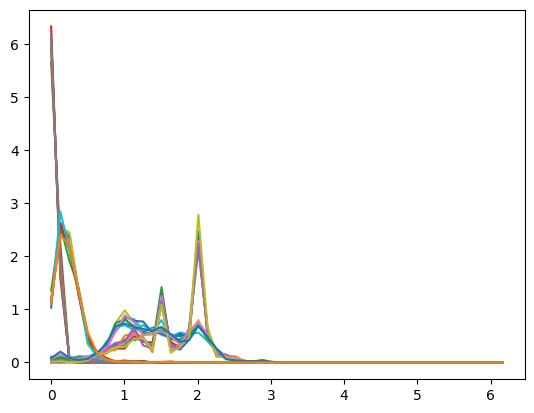

In [99]:
#dg = df[(df["file_id"]=="mag2p_shift_0_lambda_100_phi2d_0.0106_rid_2")]
dg = df.drop(["file_id","lambda","shift"], axis=1)

x = [key for key in dg.keys()]
print(x)
fig, ax = plt.subplots()    # create figure and axes

x.insert
for index, row in dg[x].iterrows(): 
        ax.plot(x,row)
plt.show()

In [96]:
from scipy.signal import find_peaks

y=row.values
print(y)
y=np.append(0,y)
peaks, properties = find_peaks(y, prominence=0.05, height=0.1)


[5.89169851445774 1.947423837832508 0.009885400192043188 0.0
 0.08896860172838873 0.01977080038408637 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


In [98]:
for i in peaks:
    print(x[i])
    
print(properties)

0.12566370614359174
{'peak_heights': array([5.89169851]), 'prominences': array([5.89169851]), 'left_bases': array([0]), 'right_bases': array([4])}


In [60]:
3*np.pi/4

2.356194490192345

In [102]:
import numpy as np 
N1=1000
N2=2000
4*N1*np.log(N1) + 4*N2*np.log(N2) - 4*(N1+N2)*np.log(N1+N2)

-7638.170019537749